# 1번

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("FIFA.csv", encoding="euc-kr")
df.head(3)

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642 entries, 0 to 16641
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    16642 non-null  int64 
 1   Name                  16642 non-null  object
 2   Age                   16642 non-null  int64 
 3   Nationality           16642 non-null  object
 4   Overall               16642 non-null  int64 
 5   Club                  16642 non-null  object
 6   Preferred_Foot        16642 non-null  object
 7   Work_Rate             16642 non-null  object
 8   Position              16642 non-null  object
 9   Jersey_Number         16642 non-null  int64 
 10  Contract_Valid_Until  16642 non-null  int64 
 11  Height                16642 non-null  object
 12  Weight_lb             16642 non-null  int64 
 13  Release_Clause        16642 non-null  int64 
 14  Value                 16642 non-null  int64 
 15  Wage                  16642 non-null

In [5]:
def createcm(x):
    x_split=x.split("'")
    cm=int(x_split[0])*30+int(x_split[1])*2.5
    return cm

df['Height_cm']=df['Height'].apply(createcm)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642 entries, 0 to 16641
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    16642 non-null  int64  
 1   Name                  16642 non-null  object 
 2   Age                   16642 non-null  int64  
 3   Nationality           16642 non-null  object 
 4   Overall               16642 non-null  int64  
 5   Club                  16642 non-null  object 
 6   Preferred_Foot        16642 non-null  object 
 7   Work_Rate             16642 non-null  object 
 8   Position              16642 non-null  object 
 9   Jersey_Number         16642 non-null  int64  
 10  Contract_Valid_Until  16642 non-null  int64  
 11  Height                16642 non-null  object 
 12  Weight_lb             16642 non-null  int64  
 13  Release_Clause        16642 non-null  int64  
 14  Value                 16642 non-null  int64  
 15  Wage               

In [7]:
df.head(3)

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5


# 2번

In [9]:
df.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LM', 'LB', 'RDM', 'RW',
       'CM', 'RB', 'RAM', 'CF', 'LAM', 'RWB', 'LWB'], dtype=object)

In [10]:
p_dict = { 'Forward' : ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW'],
          'MidFielder' : ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM'],
          'Defender': ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],
          'GoalKeeper' :['GK']}

In [11]:
def get_key(x):
    for key, value in p_dict.items():
        if x in value:
            y=key
            return y

In [12]:
df['Position_class']=df['Position'].apply(get_key)

In [13]:
df.head(3)

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5,Forward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0,Forward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5,Forward


# 3번

In [15]:
import scipy.stats as stats
forward=df[df['Position_class']=='Forward']['Value']
MidFielder=df[df['Position_class']=='MidFielder']['Value']
Defender=df[df['Position_class']=='Defender']['Value']
GoalKeeper=df[df['Position_class']=='GoalKeeper']['Value']

H0 : 집단간 모평균에 차이가 없다
    
H1 : 집단간 모집단 평균이 모두 같다고 할 수 없다.

In [16]:
stats.f_oneway(forward, MidFielder, Defender, GoalKeeper)

F_onewayResult(statistic=41.87390580849466, pvalue=5.988667429906719e-27)

귀무가설을 기각한다. 집단간 모집단 평균이 모두 같다고 할 수 없다.

-> 사후검정 진행

C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
Defender,Forward,930.373,0.001,610.7429,1250.0031,True
Defender,GoalKeeper,-507.3848,0.0034,-887.6261,-127.1436,True
Defender,MidFielder,760.8787,0.001,486.7123,1035.045,True
Forward,GoalKeeper,-1437.7579,0.001,-1865.9234,-1009.5923,True
Forward,MidFielder,-169.4944,0.5609,-506.9991,168.0104,False
GoalKeeper,MidFielder,1268.2635,0.001,872.8782,1663.6488,True


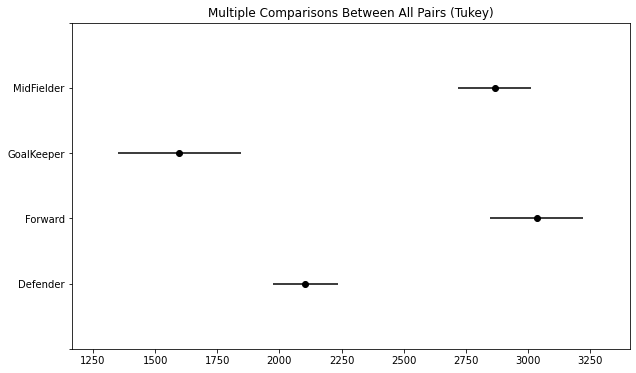

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc=MultiComparison(data=df['Value'], groups=df['Position_class'])
tukeyhsd=mc.tukeyhsd(alpha=0.05)
fig=tukeyhsd.plot_simultaneous()
tukeyhsd.summary()

In [21]:
data=df[["Value", "Position_class", "Preferred_Foot"]]
data

,Value,Position_class,Preferred_Foot
0,110500,Forward,Left
1,77000,Forward,Right
2,118500,Forward,Right
3,72000,GoalKeeper,Right
4,102000,MidFielder,Right
...,...,...,...
16637,60,MidFielder,Right
16638,60,Forward,Right
16639,60,Forward,Right
16640,60,Forward,Right


- 이원배치 분산분석 수행

In [22]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula='Value~C(Position_class)+C(Preferred_Foot)+C(Position_class):C(Preferred_Foot)'
model=ols(formula, data).fit()
aov_table=anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Position_class),4.087367e+09,3.0,41.975902,5.151392e-27
C(Preferred_Foot),1.522715e+08,1.0,4.691332,3.032930e-02
C(Position_class):C(Preferred_Foot),4.736156e+08,3.0,4.863874,2.207249e-03
Residual,5.399071e+11,16634.0,NaN,NaN


교호작용이 있음. 각각의 x형 변수는 모두 x에 따른 y 평균간 유의미한 차이가 존재하는 것을 확인

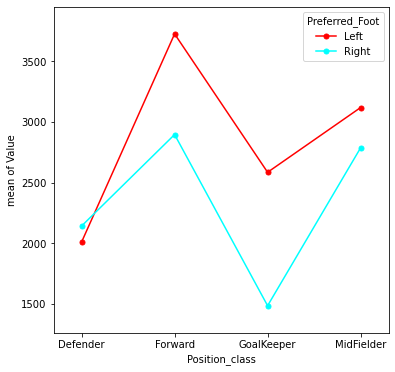

In [24]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

변수1=df['Position_class']
변수2=df['Preferred_Foot']
y변수=df['Value']

fig, ax= plt.subplots(figsize=(6,6))
fig=interaction_plot(변수1, 변수2, y변수, ms=10, ax=ax)

In [23]:
df['Position_class'].unique()

array(['Forward', 'GoalKeeper', 'MidFielder', 'Defender'], dtype=object)

- 다중선형회귀 진행

In [25]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

model=smf.ols(formula='Value~Age+Overall+Wage+Height_cm+Weight_lb', data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 1.258e+04
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:14:35   Log-Likelihood:            -1.5458e+05
No. Observations:               16642   AIC:                         3.092e+05
Df Residuals:                   16636   BIC:                         3.092e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9018.2165    681.645    -13.230      0.000   -1.04e+04   -7682.119
Age         -201.2516      5.030    -40.010      0.000    -211.111    -191.392
Overall      241.6286      4.013     60.213      0.000     233.763     249.494
Wage         184.1729      1.128    163.298      0.000     181.962     186.384
Height_cm     -5.0167      4.743     -1.058      0.290     -14.314       4.280
Weight_lb     -1.9622      2.064     -0.951      0.342      -6.007       2.083
==============================================================================
Omnibus:                    17088.175   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3525415.526
Skew:                           4.665   Prob(JB):                         0.00
Kurtosis:                      73.690   Cond. No.                     8.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 다중공선성 파악

In [27]:
df[['Age','Overall', 'Wage', 'Height_cm', 'Weight_lb']].corr()

,Age,Overall,Wage,Height_cm,Weight_lb
Age,1.000000,0.464903,0.148563,0.085335,0.232524
Overall,0.464903,1.000000,0.573953,0.038583,0.154307
Wage,0.148563,0.573953,1.000000,0.020167,0.065241
Height_cm,0.085335,0.038583,0.020167,1.000000,0.755261
Weight_lb,0.232524,0.154307,0.065241,0.755261,1.000000


0.9 이상의 상관성을 보이는 변수는 없음

In [28]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X=dmatrices('Value ~ Age + Overall + Wage + Height_cm + Weight_lb', data=df, return_type='dataframe')

In [30]:
y

,Value
0,110500.0
1,77000.0
2,118500.0
3,72000.0
4,102000.0
...,...
16637,60.0
16638,60.0
16639,60.0
16640,60.0


In [33]:
vif_list=[]
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values,i), X.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,1.367758,Age
1,1.922019,Overall
2,1.532333,Wage
3,2.385914,Height_cm
4,2.510890,Weight_lb


10보다 큰 변수는 없으므로 다중공선성은 없다고 판단함

In [34]:
import time 
import itertools

def processSubset(X,y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {'model':regr, 'AIC':AIC}

#전진선택법
def forward(X,y,predictors):
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors + [p] + ['Intercept']))
        
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()]
    print('Proceed', models.shape[0], 'models on', len(predictors)+1, 'predictors in')
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[0])
    return best_model

#후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y=y, feature_set=list(combo) + ['Intercept']))
    
    models = pd.DataFrame(results)
    best_model= models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print('Processed', models.shape[0], 'models on', len(predictors)-1, 'predictors in', (toc-tic))
    print('Selected predictors:', best_model['model'].model.exog_names,
          'AIC:', best_model[0])
    return best_model

#단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=['AIC','model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y, predictors+['Intercept'])['AIC']
    
    for i in range(1, len(X.columns.difference(['Intercept']))+1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k!= 'Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        
        if Backward_result['AIC'] < Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k!='Intercept']
            print('backward')
            
        if Stepmodels.loc[i]['AIC'] > Smodel_before:
            break
        
        else:
            Smodel_before = Stepmodels.loc[i]['AIC']
            
    toc = time.time()
    print('Total elapsed time : ',(toc-tic), 'seconds') 
    
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [35]:
Stepwise_best_model=Stepwise_model(X=X, y=y)

Proceed 5 models on 1 predictors in
Selected predictors: ['Wage', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002352CED3760>
forward
Processed 1 models on 0 predictors in 0.007453441619873047
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002352EE39550>
Proceed 4 models on 2 predictors in
Selected predictors: ['Wage', 'Overall', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002352CF090D0>
forward
Processed 2 models on 1 predictors in 0.013005495071411133
Selected predictors: ['Wage', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002352EE39250>
Proceed 3 models on 3 predictors in
Selected predictors: ['Wage', 'Overall', 'Age', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002352CED6F10>
forward
Processed 3 models on 2 predi

In [36]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 1.572e+04
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:45:18   Log-Likelihood:            -1.5458e+05
No. Observations:               16642   AIC:                         3.092e+05
Df Residuals:                   16637   BIC:                         3.092e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Wage         184.1837      1.128    163.317      0.000     181.973     186.394
Overall      241.3450      4.002     60.310      0.000     233.501     249.189
Age         -202.1603      4.938    -40.936      0.000    -211.840    -192.480
Height_cm     -8.4446      3.082     -2.740      0.006     -14.486      -2.403
Intercept  -8690.8178    588.280    -14.773      0.000   -9843.908   -7537.727
==============================================================================
Omnibus:                    17089.038   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3525378.426
Skew:                           4.665   Prob(JB):                         0.00
Kurtosis:                      73.690   Cond. No.                     5.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Weight_lb만 제거된 모델이 최적의 모델임!